<b> Preparation <b/>

In [1]:
import numpy as np # maths
import matplotlib.pyplot as plt # plotting

<b> Below, you see a 3D grid containing sample points (6 points per axis) of the rgb cube </b>

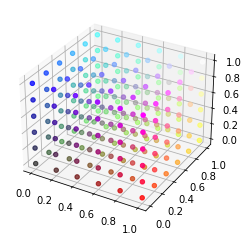

In [3]:

# get a cube with low resolution (6 points per axis)
# [0, 0.2, 0.4, 0.6, 0.8, 1.0]

grid_x = np.arange(0,1.1, 0.2)
grid_y = np.arange(0,1.1, 0.2)
grid_z = np.arange(0,1.1, 0.2)

# create all points in the cube
X,Y,Z = np.meshgrid(grid_x, grid_y, grid_z)

# set the position as rgb value
colors = [(x,y,z) for x,y,z in zip(X.flatten(), Y.flatten(), Z.flatten())]

# organize the colors in a grid for easier indexing
colors_as_grid = np.reshape(colors, (X.shape[0], X.shape[1], X.shape[2], 3))

# plots the cube in the colors given
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c = np.reshape(colors_as_grid, (-1, 3)), s=20)
plt.show()

<b> Using trilinear interpolation to plot 20 points per axis. </b>

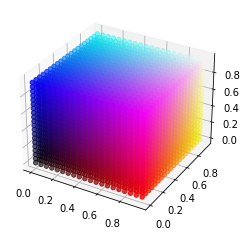

In [4]:
#@title Trilinear Interpolation

# sample a fine grid
fine_x_grid = np.arange(0,1,0.05)
fine_y_grid = np.arange(0,1,0.05)
fine_z_grid = np.arange(0,1,0.05)

# create the meshgrid for the fine resolution
fine_X, fine_Y, fine_Z = np.meshgrid(fine_x_grid, fine_y_grid, fine_z_grid)


###########################################
# Perform the trilinear interpolation here.
# Generate 20 sample points per axis.
# Following these steps might help you:

# 1. Get the left and right's neighbor index of a given point according to the grid values on the respective dimensions

# 2.Implements trilinear interpolation according to https://en.wikipedia.org/wiki/Trilinear_interpolation:
# 2.1. calculate mid-points and their colors in x-direction
# 2.2. calculate mid-points and their colors in y-direction
# 2.3. calculate final point and its color in z-direction

# 3. plot the fine-grid points and its interpolated colors
# It should be similar to the first plot, just with more points.
###########################################


#first we consider z is 0 and we are on xoy plane:
#for each y=constant, for those dots that their x is changing:
#their x is changing in fine_x_grid: two times of midpointing!
#1st
#from grid_x=[0,0.2,0.4,0.6,0.8,1]
# we move to fin_x_grid_1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#in order to get the colors:
# we move from colors_as_grid[:,constant,0] to colors_as_fine_grid_1
color_as_fine_x_grid_1=np.zeros(shape=(11,6,6,3))
color_as_fine_x_grid=np.zeros(shape=(20,6,6,3))

for i in range(6):
  for j in range(6):
    color_as_fine_x_grid_1[0,i,j,:]=colors_as_grid[0,i,j] #x=0
    color_as_fine_x_grid_1[1,i,j,:]=(colors_as_grid[0,i,j]+colors_as_grid[1,i,j])/2 #x=0.1 x=0+x=0.2 /2
    color_as_fine_x_grid_1[2,i,j,:]=colors_as_grid[1,i,j] #x=0.2
    color_as_fine_x_grid_1[3,i,j,:]=(colors_as_grid[1,i,j]+colors_as_grid[2,i,j])/2 #x=0.3 x=0.2+x=0.4 /2
    color_as_fine_x_grid_1[4,i,j,:]=colors_as_grid[2,i,j] #x=0.4 
    color_as_fine_x_grid_1[5,i,j,:]=(colors_as_grid[2,i,j]+colors_as_grid[3,i,j])/2 #x=0.5 
    color_as_fine_x_grid_1[6,i,j,:]=colors_as_grid[3,i,j] #x=0.6
    color_as_fine_x_grid_1[7,i,j,:]=(colors_as_grid[3,i,j]+colors_as_grid[4,i,j])/2 #x=0.7
    color_as_fine_x_grid_1[8,i,j,:]=colors_as_grid[4,i,j] #x=0.8
    color_as_fine_x_grid_1[9,i,j,:]=(colors_as_grid[4,i,j]+colors_as_grid[5,i,j])/2 #x=0.9
    color_as_fine_x_grid_1[10,i,j,:]=colors_as_grid[5,i,j] #x=1

#2nd
#from fin_x_grid_1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# we move to fin_x_grid=[0,0.,05,0.1,0.,15,0.2,0.,25,0.3,0.,35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#in order to get the colors:
# we move from colors_as_grid[:,constant,0] to colors_as_fine_grid_1
for i in range(6):
  for j in range(6):
    color_as_fine_x_grid[0,i,j,:]=color_as_fine_x_grid_1[0,i,j] #x=0
    color_as_fine_x_grid[1,i,j,:]=(color_as_fine_x_grid_1[0,i,j]+color_as_fine_x_grid_1[1,i,j])/2 #x=0.05 x=0+x=0.1 /2
    color_as_fine_x_grid[2,i,j,:]=color_as_fine_x_grid_1[1,i,j] #x=0.1
    color_as_fine_x_grid[3,i,j,:]=(color_as_fine_x_grid_1[1,i,j]+color_as_fine_x_grid_1[2,i,j])/2 #x=0.15 x=0.1+x=0.2 /2
    color_as_fine_x_grid[4,i,j,:]=color_as_fine_x_grid_1[2,i,j] #x=0.2 
    color_as_fine_x_grid[5,i,j,:]=(color_as_fine_x_grid_1[2,i,j]+color_as_fine_x_grid_1[3,i,j])/2 #x=0.25
    color_as_fine_x_grid[6,i,j,:]=color_as_fine_x_grid_1[3,i,j] #x=0.3
    color_as_fine_x_grid[7,i,j,:]=(color_as_fine_x_grid_1[3,i,j]+color_as_fine_x_grid_1[4,i,j])/2 #x=0.35
    color_as_fine_x_grid[8,i,j,:]=color_as_fine_x_grid_1[4,i,j] #x=0.4
    color_as_fine_x_grid[9,i,j,:]=(color_as_fine_x_grid_1[4,i,j]+color_as_fine_x_grid_1[5,i,j])/2 #x=0.45
    color_as_fine_x_grid[10,i,j,:]=color_as_fine_x_grid_1[5,i,j] #x=0.5
    color_as_fine_x_grid[11,i,j,:]=(color_as_fine_x_grid_1[5,i,j]+color_as_fine_x_grid_1[6,i,j])/2#x=0.55
    color_as_fine_x_grid[12,i,j,:]=color_as_fine_x_grid_1[6,i,j] #x=0.6
    color_as_fine_x_grid[13,i,j,:]=(color_as_fine_x_grid_1[6,i,j]+color_as_fine_x_grid_1[7,i,j])/2 #x=0.65
    color_as_fine_x_grid[14,i,j,:]=color_as_fine_x_grid_1[7,i,j] #x=0.7
    color_as_fine_x_grid[15,i,j,:]=(color_as_fine_x_grid_1[7,i,j]+color_as_fine_x_grid_1[8,i,j])/2#x=0.75
    color_as_fine_x_grid[16,i,j,:]=color_as_fine_x_grid_1[8,i,j] #x=0.8
    color_as_fine_x_grid[17,i,j,:]=(color_as_fine_x_grid_1[8,i,j]+color_as_fine_x_grid_1[9,i,j])/2#x=0.85
    color_as_fine_x_grid[18,i,j,:]=color_as_fine_x_grid_1[9,i,j] #x=0.9
    color_as_fine_x_grid[19,i,j,:]=(color_as_fine_x_grid_1[9,i,j]+color_as_fine_x_grid_1[10,i,j])/2 #x=0.95
#-----------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#now we consider z is 0 and we are on xoy plane:
#for each x=constant, for those dots that their y is changing:
#their y is changing in fine_y_grid: two times of midpointing!
#1st
#from grid_y=[0,0.2,0.4,0.6,0.8,1]
# we move to fin_y_grid_1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#in order to get the colors:
# we move from colors_as_grid[constant,:,0] to colors_as_fine_grid_1
color_as_fine_y_grid_1=np.zeros(shape=(20,11,6,3))
color_as_fine_y_grid=np.zeros(shape=(20,20,6,3))
for i in range(20):
  for j in range(6):
    color_as_fine_y_grid_1[i,0,j,:]=color_as_fine_x_grid[i,0,j] #y=0
    color_as_fine_y_grid_1[i,1,j,:]=(color_as_fine_x_grid[i,0,j]+color_as_fine_x_grid[i,1,j])/2 #y=0.1 y=0+y=0.2 /2
    color_as_fine_y_grid_1[i,1,j,:]=(color_as_fine_x_grid[i,0,j]+color_as_fine_x_grid[i,1,j])/2 #y=0.1 y=0+y=0.2 /2
    color_as_fine_y_grid_1[i,2,j,:]=color_as_fine_x_grid[i,1,j] #y=0.2
    color_as_fine_y_grid_1[i,3,j,:]=(color_as_fine_x_grid[i,1,j]+color_as_fine_x_grid[i,2,j])/2 #y=0.3 y=0.2+y=0.4 /2
    color_as_fine_y_grid_1[i,4,j,:]=color_as_fine_x_grid[i,2,j] #y=0.4 
    color_as_fine_y_grid_1[i,5,j,:]=(color_as_fine_x_grid[i,2,j]+color_as_fine_x_grid[i,3,j])/2 #y=0.5 
    color_as_fine_y_grid_1[i,6,j,:]=color_as_fine_x_grid[i,3,j] #y=0.6
    color_as_fine_y_grid_1[i,7,j,:]=(color_as_fine_x_grid[i,3,j]+color_as_fine_x_grid[i,4,j])/2 #y=0.7
    color_as_fine_y_grid_1[i,8,j,:]=color_as_fine_x_grid[i,4,j] #y=0.8
    color_as_fine_y_grid_1[i,9,j,:]=(color_as_fine_x_grid[i,4,j]+color_as_fine_x_grid[i,5,j])/2 #y=0.9
    color_as_fine_y_grid_1[i,10,j,:]=color_as_fine_x_grid[i,5,j] #y=1

#2nd
#from fine_grid_y_1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# we move to fin_y_grid=[0,0.05,0.1,0.,15,0.2,0.,25,0.3,0.,35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#in order to get the colors:
# we move from colors_as_grid[:,constant,0] to colors_as_fine_grid_1
for i in range(20):
  for j in range(6):
    color_as_fine_y_grid[i,0,j,:]=color_as_fine_y_grid_1[i,0,j] #y=0
    color_as_fine_y_grid[i,1,j,:]=(color_as_fine_y_grid_1[i,0,j]+color_as_fine_y_grid_1[i,1,j])/2 #y=0.05 x=0+x=0.1 /2
    color_as_fine_y_grid[i,2,j,:]=color_as_fine_y_grid_1[i,1,j] #y=0.1
    color_as_fine_y_grid[i,3,j,:]=(color_as_fine_y_grid_1[i,1,j]+color_as_fine_y_grid_1[i,2,j])/2 #y=0.15 x=0.1+x=0.2 /2
    color_as_fine_y_grid[i,4,j,:]=color_as_fine_y_grid_1[i,2,j] #y=0.2 
    color_as_fine_y_grid[i,5,j,:]=(color_as_fine_y_grid_1[i,2,j]+color_as_fine_y_grid_1[i,3,j])/2 #y=0.25
    color_as_fine_y_grid[i,6,j,:]=color_as_fine_y_grid_1[i,3,j] #y=0.3
    color_as_fine_y_grid[i,7,j,:]=(color_as_fine_y_grid_1[i,3,j]+color_as_fine_y_grid_1[i,4,j])/2 #y=0.35
    color_as_fine_y_grid[i,8,j,:]=color_as_fine_y_grid_1[i,4,j] #y=0.4
    color_as_fine_y_grid[i,9,j,:]=(color_as_fine_y_grid_1[i,4,j]+color_as_fine_y_grid_1[i,5,j])/2 #y=0.45
    color_as_fine_y_grid[i,10,j,:]=color_as_fine_y_grid_1[i,5,j] #y=0.5
    color_as_fine_y_grid[i,11,j,:]=(color_as_fine_y_grid_1[i,5,j]+color_as_fine_y_grid_1[i,6,j])/2#y=0.55
    color_as_fine_y_grid[i,12,j,:]=color_as_fine_y_grid_1[i,6,j] #y=0.6
    color_as_fine_y_grid[i,13,j,:]=(color_as_fine_y_grid_1[i,6,j]+color_as_fine_y_grid_1[i,7,j])/2 #y=0.65
    color_as_fine_y_grid[i,14,j,:]=color_as_fine_y_grid_1[i,7,j] #y=0.7
    color_as_fine_y_grid[i,15,j,:]=(color_as_fine_y_grid_1[i,7,j]+color_as_fine_y_grid_1[i,8,j])/2#y=0.75
    color_as_fine_y_grid[i,16,j,:]=color_as_fine_y_grid_1[i,8,j] #y=0.8
    color_as_fine_y_grid[i,17,j,:]=(color_as_fine_y_grid_1[i,8,j]+color_as_fine_y_grid_1[i,9,j])/2#y=0.85
    color_as_fine_y_grid[i,18,j,:]=color_as_fine_y_grid_1[i,9,j] #y=0.9
    color_as_fine_y_grid[i,19,j,:]=(color_as_fine_y_grid_1[i,9,j]+color_as_fine_y_grid_1[i,10,j])/2 #y=0.95

#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#now we consider we are on xoy plane and we want to travel on z axis
#for each x=constant and y=constant for those dots that their z is changing:
#their z is changing in fine_y_grid: two times of midpointing!
#1st
#from grid_z=[0,0.2,0.4,0.6,0.8,1]
# we move to fin_z_grid_1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#in order to get the colors:
# we move from colors_as_grid[constant,constant,0] to colors_as_fine_grid_1
color_as_fine_z_grid_1=np.zeros(shape=(20,20,11,3))
color_as_fine_z_grid=np.zeros(shape=(20,20,20,3))
for i in range(20):
  for j in range(20):
      color_as_fine_z_grid_1[i,j,0,:]=color_as_fine_y_grid[i,j,0,:] #y=0
      color_as_fine_z_grid_1[i,j,1,:]=(color_as_fine_y_grid[i,j,0,:]+color_as_fine_y_grid[i,j,1,:])/2 #y=0.1 y=0+y=0.2 /2
      color_as_fine_z_grid_1[i,j,1,:]=(color_as_fine_y_grid[i,j,0,:]+color_as_fine_y_grid[i,j,1,:])/2 #y=0.1 y=0+y=0.2 /2
      color_as_fine_z_grid_1[i,j,2,:]=color_as_fine_y_grid[i,j,1,:] #y=0.2
      color_as_fine_z_grid_1[i,j,3,:]=(color_as_fine_y_grid[i,j,1,:]+color_as_fine_y_grid[i,j,2,:])/2 #y=0.3 y=0.2+y=0.4 /2
      color_as_fine_z_grid_1[i,j,4,:]=color_as_fine_y_grid[i,j,2,:] #y=0.4 
      color_as_fine_z_grid_1[i,j,5,:]=(color_as_fine_y_grid[i,j,2,:]+color_as_fine_y_grid[i,j,3,:])/2 #y=0.5 
      color_as_fine_z_grid_1[i,j,6,:]=color_as_fine_y_grid[i,j,3,:] #y=0.6
      color_as_fine_z_grid_1[i,j,7,:]=(color_as_fine_y_grid[i,j,3,:]+color_as_fine_y_grid[i,j,4,:])/2 #y=0.7
      color_as_fine_z_grid_1[i,j,8,:]=color_as_fine_y_grid[i,j,4,:] #y=0.8
      color_as_fine_z_grid_1[i,j,9,:]=(color_as_fine_y_grid[i,j,4,:]+color_as_fine_y_grid[i,j,5,:])/2 #y=0.9
      color_as_fine_z_grid_1[i,j,10,:]=color_as_fine_y_grid[i,j,5,:] #y=1


#2nd
#from fine_grid_z_1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# we move to fin_z_grid=[0,0.05,0.1,0.,15,0.2,0.,25,0.3,0.,35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#in order to get the colors:
# we move from colors_as_grid[constant,constant,:] to colors_as_fine_grid_1
for i in range(20):
  for j in range(20):
    color_as_fine_z_grid[i,j,0,:]=color_as_fine_z_grid_1[i,j,0,:] #z=0
    color_as_fine_z_grid[i,j,1,:]=(color_as_fine_z_grid_1[i,j,0,:]+color_as_fine_z_grid_1[i,j,1,:])/2 #z=0.05 z=0+z=0.1 /2
    color_as_fine_z_grid[i,j,2,:]=color_as_fine_z_grid_1[i,j,1,:] #z=0.1
    color_as_fine_z_grid[i,j,3,:]=(color_as_fine_z_grid_1[i,j,1,:]+color_as_fine_z_grid_1[i,j,2,:])/2 #z=0.15 z=0.1+z=0.2 /2
    color_as_fine_z_grid[i,j,4,:]=color_as_fine_z_grid_1[i,j,2,:] #z=0.2 
    color_as_fine_z_grid[i,j,5,:]=(color_as_fine_z_grid_1[i,j,2,:]+color_as_fine_z_grid_1[i,j,3,:])/2 #z=0.25
    color_as_fine_z_grid[i,j,6,:]=color_as_fine_z_grid_1[i,j,3,:] #z=0.3
    color_as_fine_z_grid[i,j,7,:]=(color_as_fine_z_grid_1[i,j,3,:]+color_as_fine_z_grid_1[i,j,4,:])/2 #z=0.35
    color_as_fine_z_grid[i,j,8,:]=color_as_fine_z_grid_1[i,j,4,:] #z=0.4
    color_as_fine_z_grid[i,j,9,:]=(color_as_fine_z_grid_1[i,j,4,:]+color_as_fine_z_grid_1[i,j,5,:])/2 #z=0.45
    color_as_fine_z_grid[i,j,10,:]=color_as_fine_z_grid_1[i,j,5,:] #z=0.5
    color_as_fine_z_grid[i,j,11,:]=(color_as_fine_z_grid_1[i,j,5,:]+color_as_fine_z_grid_1[i,j,6,:])/2#z=0.55
    color_as_fine_z_grid[i,j,12,:]=color_as_fine_z_grid_1[i,j,6,:] #z=0.6
    color_as_fine_z_grid[i,j,13,:]=(color_as_fine_z_grid_1[i,j,6,:]+color_as_fine_z_grid_1[i,j,7,:])/2 #z=0.65
    color_as_fine_z_grid[i,j,14,:]=color_as_fine_z_grid_1[i,j,7,:] #z=0.7
    color_as_fine_z_grid[i,j,15,:]=(color_as_fine_z_grid_1[i,j,7,:]+color_as_fine_z_grid_1[i,j,8,:])/2#z=0.75
    color_as_fine_z_grid[i,j,16,:]=color_as_fine_z_grid_1[i,j,8,:] #z=0.8
    color_as_fine_z_grid[i,j,17,:]=(color_as_fine_z_grid_1[i,j,8,:]+color_as_fine_z_grid_1[i,j,9,:])/2#z=0.85
    color_as_fine_z_grid[i,j,18,:]=color_as_fine_z_grid_1[i,j,9,:] #z=0.9
    color_as_fine_z_grid[i,j,19,:]=(color_as_fine_z_grid_1[i,j,9,:]+color_as_fine_z_grid_1[i,j,10,:])/2 #z=0.95


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(fine_X, fine_Y, fine_Z, c = np.reshape(color_as_fine_z_grid, (-1, 3)), s=20)
plt.show()

<b> Plotting only points that are located on a given plane inside the cube. </b>

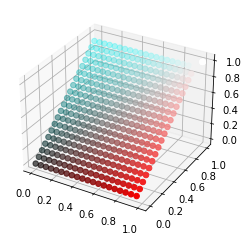

In [6]:
#@title Sample Points on a Plane

# sample points on a plane
plane_x = np.arange(0, 1, 0.05)
plane_y = np.arange(0, 1, 0.05)
plane_X, plane_Y = np.meshgrid(plane_x, plane_y)
plane_Z = plane_Y.copy()

#############################################################
# Get colors for the points on the plane defned above based
# on interpolation results from (a).
#############################################################
new_color=np.ones(shape=(20,20,20,3))
new_fine_X=np.ones(shape=(20,20,20))
new_fine_Y=np.ones(shape=(20,20,20))
new_fine_Z=np.ones(shape=(20,20,20))
for i in range(20):
  for j in range(20):
    for k in range(20):
      if i==k:
        new_color[i,j,k,:]=color_as_fine_z_grid[i,j,k,:]
        new_fine_X[i,j,k]=fine_X[i,j,k]
        new_fine_Y[i,j,k]=fine_Y[i,j,k]
        new_fine_Z[i,j,k]=fine_Z[i,j,k]


# just for debugging purposes, plot the colors in 3D space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(new_fine_X, new_fine_Y, new_fine_Z, c = np.reshape(new_color, (-1, 3)), s=30)
plt.show()